In [2]:
import glob
import os
import bs4 as bs
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import math
import unidecode
import pandas as pd

In [3]:
os.chdir("./xml/")

In [4]:
xml_list = glob.glob("*.xml")

In [5]:
len(xml_list)

298

    1. Typologie des articles

In [6]:
def get_all_text_to_txt(typ, soup):
    list_t = []
    for tag in soup.find_all('rubrique', {"typ": typ}):
        t = tag.find('texte').get_text()
        list_t.append(t) 
    return list_t

In [7]:
liste_typ = ['art', 'poe', 'his', 'cha', 'trd', 'let', 'the', 'feu', 'div']

In [8]:
dic_type = {}

for typ in liste_typ:
    n = 0
    for file in xml_list: 
        with open(file, 'r') as f:
            content = f.read()
        soup = bs.BeautifulSoup(content, 'xml')
        for tag in soup.find_all('rubrique', {"typ": typ}):
            n += 1
    dic_type[typ] = n

In [9]:
dic_len = {}


for typ in liste_typ:
    liste_t = []
    for file in xml_list:
        texts = []
        with open(file, 'r') as f:
            content = f.read()

        soup = bs.BeautifulSoup(content, 'xml')
        for tag in soup.find_all('rubrique', {"typ": typ}):
            t = tag.find('texte').get_text()
            texts.append(t)
    
        
        liste_t.extend(texts)
             
    corpus = ' '.join(liste_t)
    corpus = re.sub(r'\n', '', corpus)
    corpus = corpus.lower()
    corpus = unidecode.unidecode(corpus)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(corpus)
        
    dic_len[typ] = len(tokens)

In [10]:
dic_len

{'art': 766965,
 'poe': 217445,
 'his': 79782,
 'cha': 4983,
 'trd': 27861,
 'let': 107953,
 'the': 57881,
 'feu': 152794,
 'div': 200611}

In [11]:
dic_type

{'art': 1084,
 'poe': 870,
 'his': 124,
 'cha': 22,
 'trd': 21,
 'let': 191,
 'the': 48,
 'feu': 186,
 'div': 238}

In [12]:
full_dic = {}


for t in liste_typ:
    la = []
    la.append(dic_len[t])
    la.append(dic_type[t])

    full_dic[t] = la

In [13]:
full_dic

{'art': [766965, 1084],
 'poe': [217445, 870],
 'his': [79782, 124],
 'cha': [4983, 22],
 'trd': [27861, 21],
 'let': [107953, 191],
 'the': [57881, 48],
 'feu': [152794, 186],
 'div': [200611, 238]}

In [14]:
df = pd.DataFrame(full_dic, index=['words', 'sections']).T

In [15]:
df.T

,art,poe,his,cha,trd,let,the,feu,div
words,766965,217445,79782,4983,27861,107953,57881,152794,200611
sections,1084,870,124,22,21,191,48,186,238


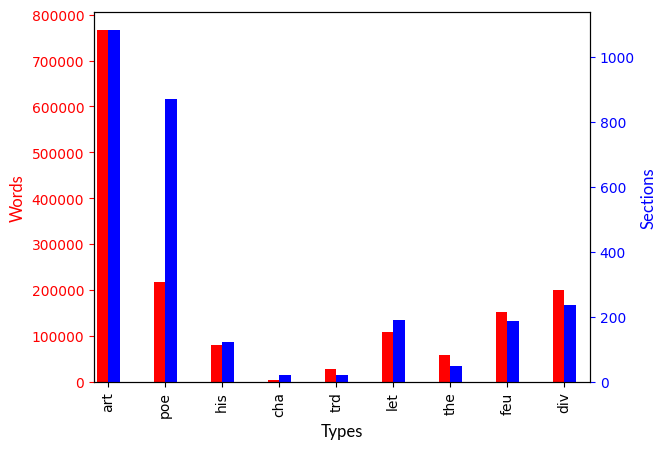

In [89]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

df['words'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df['sections'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Words', fontname='Lato', color='red', fontsize=12)
ax2.set_ylabel('Sections', fontname='Lato', color='blue', fontsize=12)
ax.set_xlabel('Types', fontname='Lato', fontsize=12)

ax.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

plt.show()

In [52]:
x = 0

for i in dic_len.values():
    x += i

In [132]:
typp = []

for i in dic_type.values():
    typp.append(i)

In [55]:
for i in dic_len.values():
    r = (i / x) * 100
    print(r)

45.3964021910532
14.036564237696075
4.897125798821479
0.3248454228566686
1.8157627188978338
6.8705131131214205
3.7573138849697068
9.88787969956013
13.013592933023489


In [183]:
l = [45, 14, 5, 1, 2, 7, 4, 10, 13]

In [166]:
z = []
for i in l:
    i = i * 10
    z.append(i)

In [144]:
l

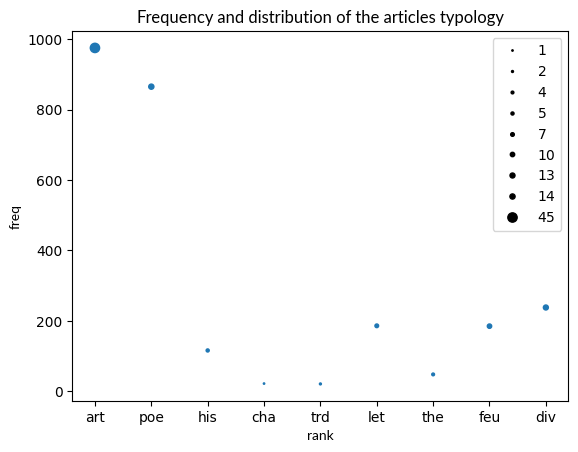

In [147]:
scatter = plt.scatter(dic_type.keys(), dic_type.values(), marker='o', s=l)
plt.title("Frequency and distribution of the articles typology", fontname="Lato")
plt.ylabel("freq", fontname="Lato")
plt.xlabel("rank", fontname="Lato")

legend1 = plt.legend(*scatter.legend_elements("sizes"))

plt.show()

In [126]:
i = dic_type.keys()

In [128]:
i[1]

TypeError: 'dict_keys' object is not subscriptable

In [131]:
print(liste_typ)

['art', 'poe', 'his', 'cha', 'trd', 'let', 'the', 'feu', 'div']


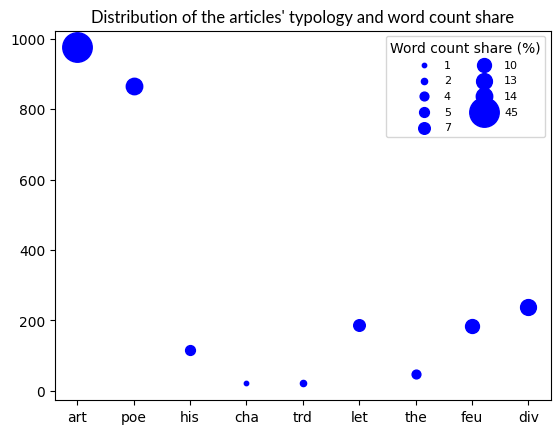

In [195]:
lo = plt.scatter(liste_typ[0], typp[0], s=z[0], marker='o', c='b')
ll = plt.scatter(liste_typ[1], typp[1], s=z[1], marker='o', c='b')
l  = plt.scatter(liste_typ[2], typp[2], s=z[2], marker='o', c='b')
a  = plt.scatter(liste_typ[3], typp[3], s=z[3], marker='o', c='b')
h  = plt.scatter(liste_typ[4], typp[4], s=z[4], marker='o', c='b')
hh = plt.scatter(liste_typ[5], typp[5], s=z[5], marker='o', c='b')
ho = plt.scatter(liste_typ[6], typp[6], s=z[6], marker='o', c='b')
hp = plt.scatter(liste_typ[7], typp[7], s=z[7], marker='o', c='b')
hm = plt.scatter(liste_typ[8], typp[8], s=z[8], marker='o', c='b')

plt.title("Distribution of the articles' typology and word count share", fontname="Lato")

plt.legend((a, h, ho, l, hh, hp, hm, ll, lo),
           ('1', '2', '4', '5', '7', '10', '13', '14', '45'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           title="Word count share (%)",
           fontsize=8)

plt.show()

In [179]:
sor = sorted(l)
sor

[1, 2, 4, 5, 7, 10, 13, 14, 45]

In [184]:
l

[45, 14, 5, 1, 2, 7, 4, 10, 13]